# Zpětnovazební učení

V tomto cvičení budeme pracovat s Open AI gym, což je open source rozhraní určené pro úkoly zpětnovazebního učení. Jeho hlavní výhodou je, že implementace různých typů algoritmů pro zpětnovazební učení je v něm celkem jednoduchá. Popis základních funkcí Open AI gym se nachází v kódu níž.

Dnešní úkol bude naimplementovat agenta, který se učí chovat v nějakém prostředí (konkrétně v MountainCar) pomocí Q-učení.

Q-učení je způsob, kdy se agent učí svou strategii, jak se chovat v daném prostředí, pomocí zpětné vazby, kterou od prostředí za své chování dostává. Na rozdíl od hladového agenta, který jen v každém stavu vybírá nový stav na základě akce, co maximalizuje jeho užitek, bere v potaz to, že mezi stavy existují vztahy, které jsou dány Bellmanovými rovnicemi.

Nyní se tedy podíváme na příklad autíčka, které se snaží dostat do cíle, ale pohybuje se náhodně.

In [2]:
# bezelo jen v py2
#conda create -n py27 python=2.7 ipykernel
#conda acitvate py27
#jupyter notebook

In [3]:
import gym
import numpy as np
import utils
import matplotlib.pyplot as plt

Ukážeme si, jak si vytvořit jednoduché prostředí *MountainCar*: https://gym.openai.com/envs/MountainCar-v0. 

Cílem je, aby se autíčko dostalu z údolí až nahori k vlaječce. V této základní verzi je zde v každém stavu náhodně zvolena akce pro pohyb.

In [14]:
env = gym.make('MountainCar-v0')
env.reset()
for i in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

Jen tak pro zajímavost existuje i například prostředí *CartPole*, kde je zase cílem vyvažovat tyčku, aby nespadla.

In [17]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

C:\Users\katie\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Vrátíme se zpět k *MountainCar*. Zkusíme do kódu výše připsat obecnou třídu pro agenta, který se v prostředí chová náhodně. Lze ho později použít jako základ pro zpětnovazebního agenta. Stav agenta je pozice a rychlost, akce může být pohyb vlevo, vpravo a nebo se nepohnout. Budeme opakovat několik iterací pro trénovaní, kdy každá iterace for cyklu je jedna hra s novým náhodným začátkem kolem minima a ve while cykle se trénují přechoy mezi stavy agenta.

observation space: Box(2,)
observation space low: [-1.2  -0.07]
observation space high: [0.6  0.07]
action space: Discrete(3)


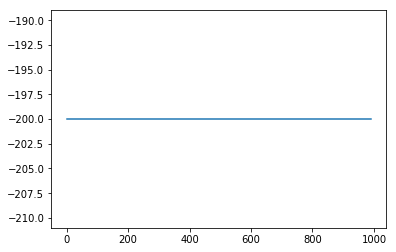

In [20]:
# Obecna trida pro agenta
class RandomAgent:
    def __init__(self, actions):
        self.actions = actions
        self.train = True
    
    def act(self, observe, reward, done):
        return self.actions.sample()
    
    def reset(self):
        pass

env = gym.make('MountainCar-v0')

# Zde si jen pro zajimavost vypiseme prostor pozorovani a akci
print('observation space:', env.observation_space)
print('observation space low:', env.observation_space.low)
print('observation space high:', env.observation_space.high)
print('action space:', env.action_space)

agent = RandomAgent(env.action_space)
total_rewards = []
for i in range(1000):
    obs = env.reset()
    agent.reset()    
    done = False
    
    r = 0
    R = 0 # celkova odmena - jen pro logovani
    t = 0 # cislo kroku - jen pro logovani
    
    while not done:
        action = agent.act(obs, r, done)
        obs, r, done, _ = env.step(action)
        R += r
        t += 1
        
    total_rewards.append(R)    
agent.train = False

# Zobrazime si animaci a graf uceni
utils.show_animation(agent, env, steps=1000, episodes=5)
plt.plot(utils.moving_average(total_rewards, 10))
plt.show() 

env.close()

## Úkol na cvičení

Zkuste si místo náhodného agenta naprogramovat třídu agenta, který se učí chovat v prostředí MountainCar pomocí Q-učení. Dejte pozor na to, že prostředí vrací jako stav spojité hodnoty, takže je třeba si z nich nějak udělat prostředí diskrétní (tedy s konečným množstvím stavů).